**Algoritmo de Agrupamento Kmeans**

**Código baseado em:**

1) https://www.kaggle.com/code/khotijahs1/k-means-clustering-of-iris-dataset

2) https://realpython.com/k-means-clustering-python/

In [268]:
!pip install plotly --upgrade
!pip install kneed # To install only knee-detection algorithm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [269]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from kneed import DataGenerator, KneeLocator # para mostrar o número de grupos ideal do agrupamento
from sklearn.cluster import KMeans # Importando a função Kmeans
from sklearn.preprocessing import StandardScaler # Função utilizada para normalização dos dados
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler # Função utilizada para normalização dos dados
from sklearn.model_selection import train_test_split

In [270]:
import pandas as pd
data = pd.read_csv('/content/sample_data/Iris.csv', ',', encoding='cp1252')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [271]:
data.head(2)

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


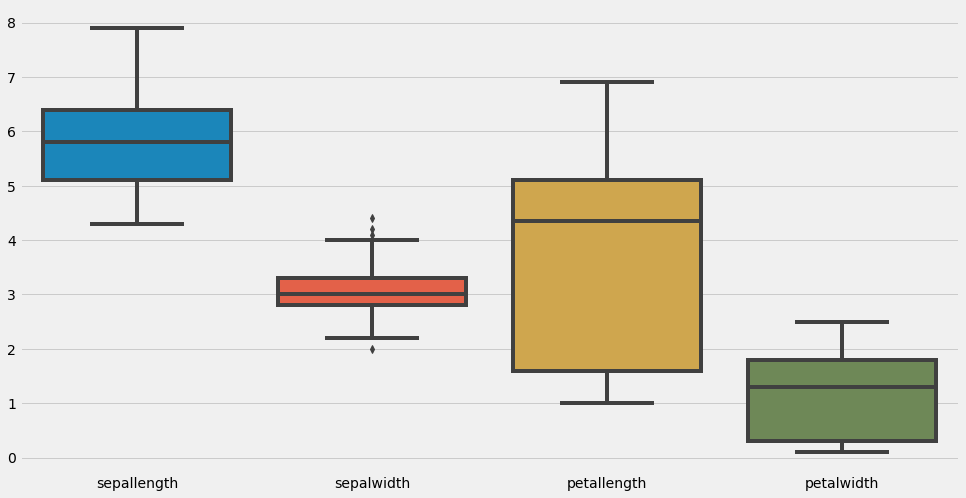

In [272]:
plt.figure(figsize=[15,8])
sns.boxplot(data=data)

In [273]:
# Remoção de outliers:
print("Old Shape: ", data.shape)
q1 = data['sepalwidth'].quantile(0.25)
q3 = data['sepalwidth'].quantile(0.75)
iqr = q3 - q1
lower_bound  = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
data = data.drop(data[data['sepalwidth'] < lower_bound].index)
data = data.drop(data[data['sepalwidth'] > upper_bound].index)
print("New Shape: ", data.shape)

Old Shape:  (150, 5)
New Shape:  (146, 5)


In [274]:
# Código para deixar o atributo classe dentro do dataset.
# data = pd.get_dummies(data, columns=['class'])
# data.head(2)

In [275]:
y = data['class']
data.drop(["class"], axis=1, inplace=True)

In [276]:
# Ver quantas colunas terá no dataset
data.shape

(146, 4)

In [277]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

In [278]:
# Entrada = data.iloc[:, 0:7].values # Caso, a coluna class estiver no data retirar o comentário dessa linha
clustering_data = data.iloc[:, 0:4].values # Data sem o atributo clas utilizar essa linha de código, utilizei ):4 para retirar o atributo class
clustering_data.shape

(146, 4)

In [279]:
scaler = MinMaxScaler()
clustering_data = scaler.fit_transform(clustering_data)

Para analisar Silhouette:
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [280]:
# Determinando a Silhouette para número máximo de cluster estimado (Raiz(instâncias/2)
limit = int((clustering_data.shape[0] // 2) ** 0.5)

for k in range(2, limit + 1):
    model = KMeans(n_clusters=k)
    model.fit(clustering_data)
    pred = model.predict(clustering_data)
    score = silhouette_score(clustering_data, pred)
    print('Silhouette Score k = {}: {:<.3f}'.format(k, score))

Silhouette Score k = 2: 0.618
Silhouette Score k = 3: 0.477
Silhouette Score k = 4: 0.426
Silhouette Score k = 5: 0.360
Silhouette Score k = 6: 0.346
Silhouette Score k = 7: 0.356
Silhouette Score k = 8: 0.369


**WCSS - Within Clusters Sum of Squares = é a soma dos quadrados dentro dos clusters**
https://rpubs.com/diascodes/770518

Veja: https://en.wikipedia.org/wiki/Elbow_method_(clustering)

In [281]:
wcss = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters=i, random_state=10)
  kmeans.fit(clustering_data)
  wcss.append(kmeans.inertia_)

**Vamos analisar o ponto de inflexão dessa curva?**

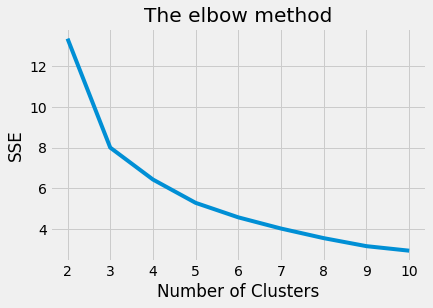

In [282]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), wcss)
plt.xticks(range(2, 11))
plt.title('The elbow method')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [283]:
kl = KneeLocator(range(2, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

4

In [284]:
# K-means++ é um método de otimização de centroide para ajudar o modelo a convergir mais rapidamente
# kmeans = KMeans(n_clusters=3, random_state=0)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y = kmeans.fit_predict(clustering_data)

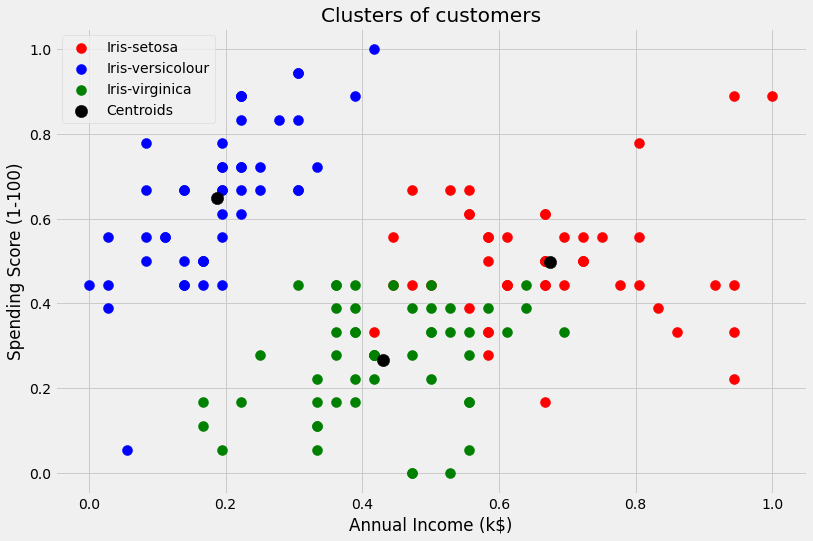

In [285]:
plt.figure(figsize=(12, 8))
plt.scatter(clustering_data[Y == 0, 0], clustering_data[Y == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(clustering_data[Y == 1, 0], clustering_data[Y == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(clustering_data[Y == 2, 0], clustering_data[Y == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'black', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [286]:
labels = kmeans.labels_
labels 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

In [287]:
df1 = pd.DataFrame({'labels':labels, "species": y})
ct1 = pd.crosstab(df1['labels'], df1['species'])
ct1

species,Iris-setosa,Iris-versicolor,Iris-virginica
labels,,,
0,0,9,39
1,47,0,0
2,0,40,11
